# Lead Scoring Case Study

#### Problem Statement: 
             

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

   The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

   Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
 
   There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

   X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
 

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

#### Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Data Understanding

In [1]:
# Importing the necessary libaries that require for analysis

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)     #setting the maximum number of columns and rows

import warnings
warnings.filterwarnings('ignore') # This code is importing the warnings module and 
                                  # then using the filterwarnings function to ignore all warnings.

%matplotlib inline    
#This code is used to display plots in the jupyter notebook.the inline keyword is used to display the plot within the notebook.

In [2]:
# Importing Dataset 

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking rows and columns in dataset

df.shape

(9240, 37)

- There are 37 columns and 9240 rows in dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- 9240 entries and 37 columns of information are provided (4 float, 3 int, 30 object).

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From above observed conversion rate of leads is 39%. The visit count is widely dispersed, with an average of 3.45 visits and a standard deviation of 4.85. The average time spent on the website is 488 seconds, with a standard deviation of 548 seconds. The average page views per visit is 2.36 with a standard deviation of 2.16. 

In [6]:
# Checking for duplicates in dataset
df['Prospect ID'].duplicated().sum() == 0

True

In [7]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


- It appears that there are no duplicates values in the "Prospect ID" column & dataset.

### Data Cleaning 

In [8]:
# As they each have a unique value, we can drop Lead Number and Prospect ID column.
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

 It is evident that several columns have Select values.
Because the customer didn't Select anything from the list, Select is displayed in this case. As good as NULL, select values are.

In [9]:
# Converting Select Values into NaN

df = df.replace('Select', np.nan)

In [10]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
# Converting the null values into percentages
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [12]:
# Removing null values with percentages higher than 40%
df = df.loc[:, (df.isnull().sum()/len(df)*100) < 40]

In [13]:
# Checking B
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [14]:
# Checking the Outlies and handling Missing values in the remaning columns

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [15]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
# EDA

In [17]:
def cat_graph(c):
    print(df[c].value_counts())
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    sns.countplot(x=df[c],ec='black',palette='gist_rainbow')
    plt.xticks(rotation=60, ha='right',fontsize=12)
    plt.title(f'Categorical chart of {c} Column',fontsize=15)
    plt.xlabel(c, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.subplot(122)
    sns.countplot(x=df[c], palette=["red", "green"], data=df, hue='Converted',ec='black')
    plt.xticks(rotation=60, ha='right',fontsize=12)
    plt.title(f'Categorical chart of {c} Column w.r.t Converted',fontsize=15)
    plt.xlabel(c, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.legend(labels=['Not Converted', 'Converted'], loc='upper right')
    plt.show()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


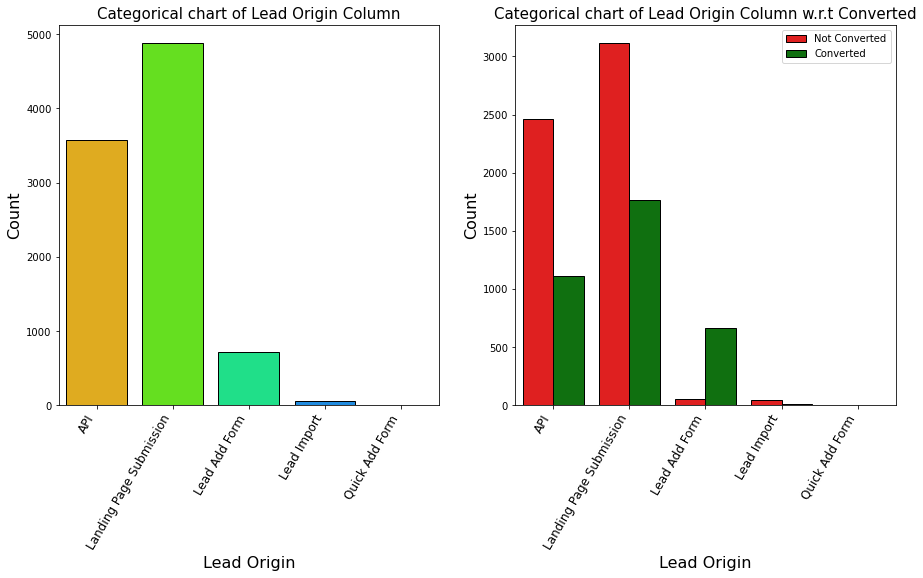

In [18]:
cat_graph('Lead Origin')

- Most Conversions are  from Landng Page Submissions and Lead Add Form.

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


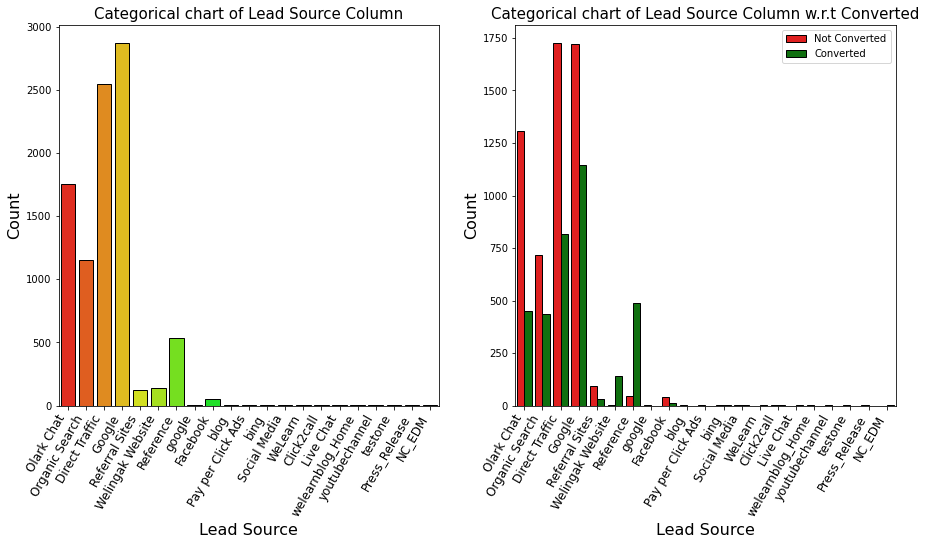

In [19]:
cat_graph('Lead Source')

- Top Lead sources are from sites like Google, Organic Search, Direct Traffic and Referrals.

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


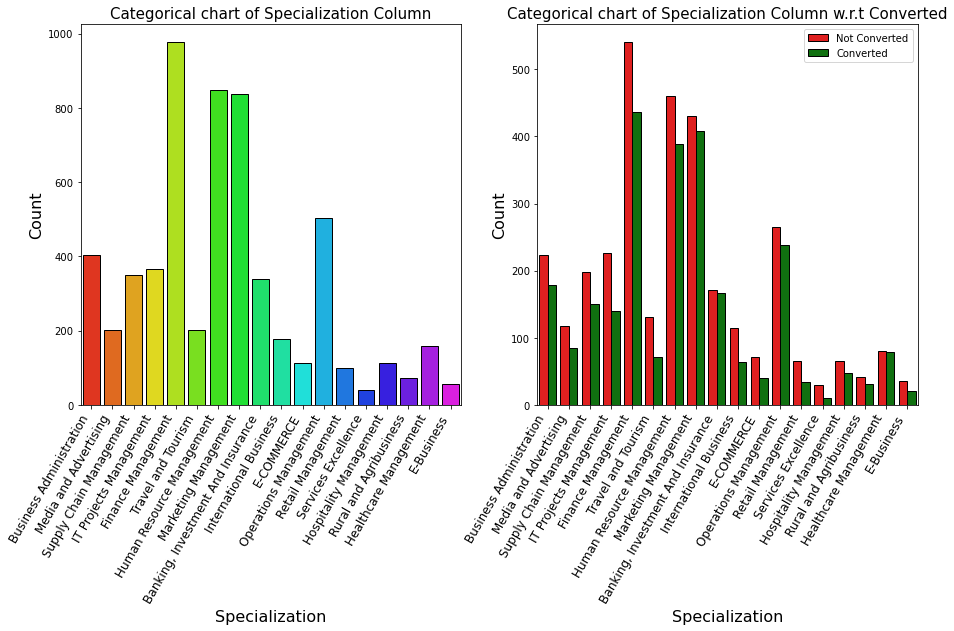

In [20]:
cat_graph('Specialization')

- Other (i.e select) category is having most followed by Finance ,Marketing , HR departments respectively where mostly customers are working.

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


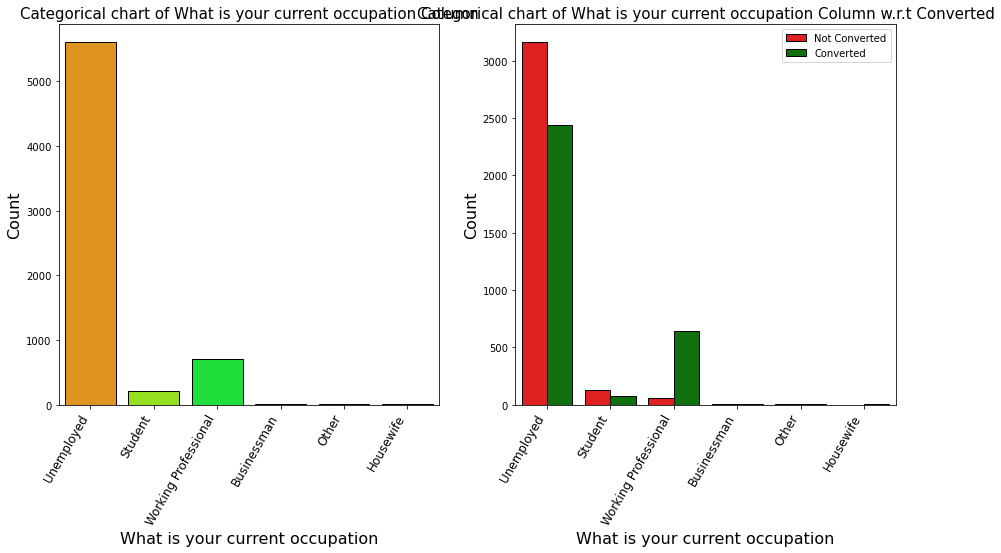

In [21]:
cat_graph('What is your current occupation')

- Most of the customers are unemployed and Working Professionals are the most converted customers.

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


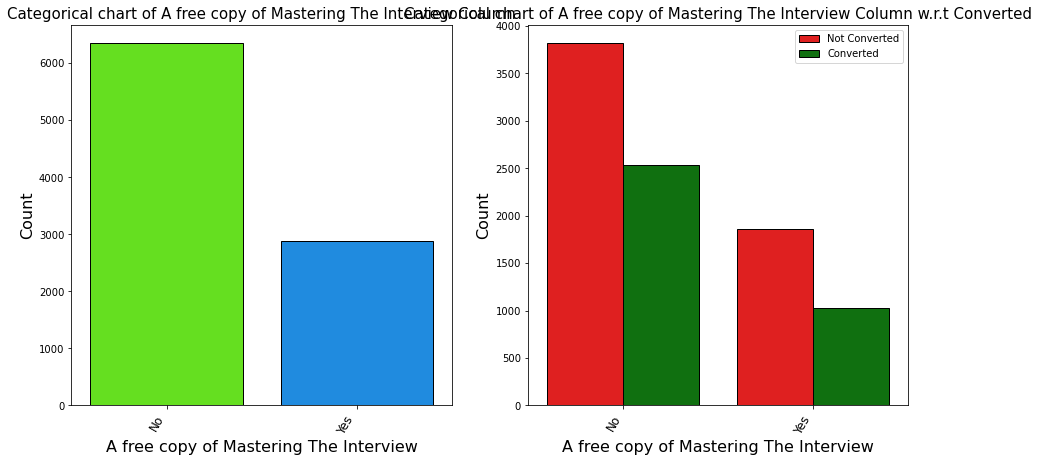

In [22]:
cat_graph('A free copy of Mastering The Interview')

- No is said by most of the customers compared to yes.

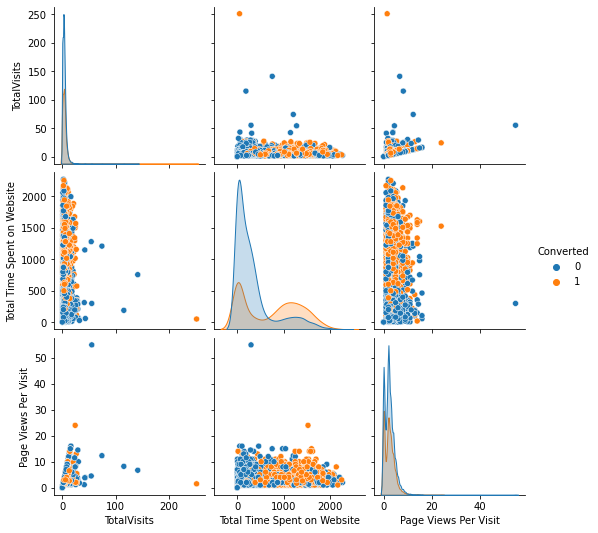

In [23]:
sns.pairplot(data=df, hue='Converted')
plt.show()

In [24]:
# Its seem to be India is the most frequent occurrence among the non-missing values, so we can substitute India for all missing values.

df['Country'].fillna('India', inplace=True)

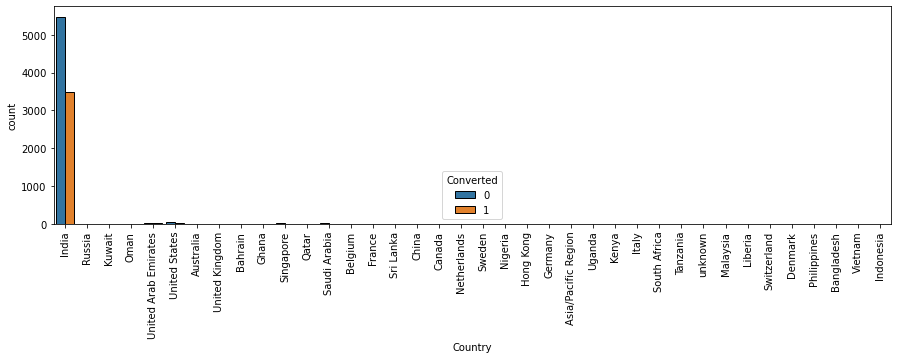

In [25]:
fig = plt.figure(figsize=(15, 4))

s1=sns.countplot(df.Country, hue=df.Converted,ec='black')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Given that India has a significant number of values (almost 97% of the data), this column can be removed.

In [26]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [27]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
df['City'] = df['City'].replace(np.NaN,'Mumbai')

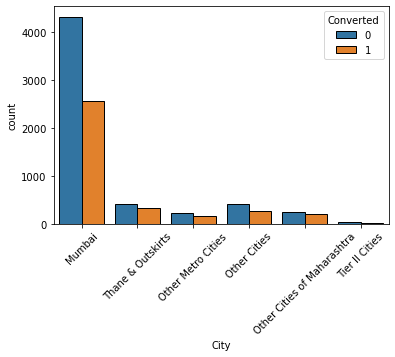

In [29]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(x='City', hue='Converted', data=df,ec='black')
plt.xticks(rotation=45)
plt.show()

### Conclusion : Mumbai is the city where most of the customers are located.

In [30]:
# Checking the Specializations Column

df['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- It's possible that the lead didn't specify specialisation since it wasn't on the list or because they are still students and don't have one yet. Thus, we shall substitute "Not Specified" for NaN values here

In [31]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

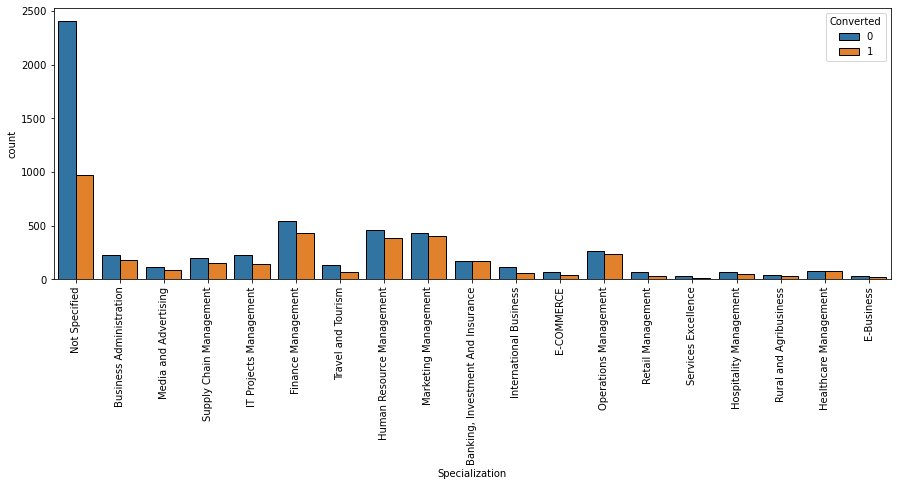

In [32]:
# Plottiing the specialization column
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted,ec='black')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- We observe that specialisations that include finance management have higher lead generation and conversion rates. So, it is clear that this factor is important and should not be ignored.

In [33]:
df['Specialization'] = df['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                           'Marketing Management', 'Operations Management',
                                                           'IT Projects Management', 'Supply Chain Management',
                                                           'Healthcare Management', 'Hospitality Management',
                                                           'Retail Management'], 'Management_Specializations')

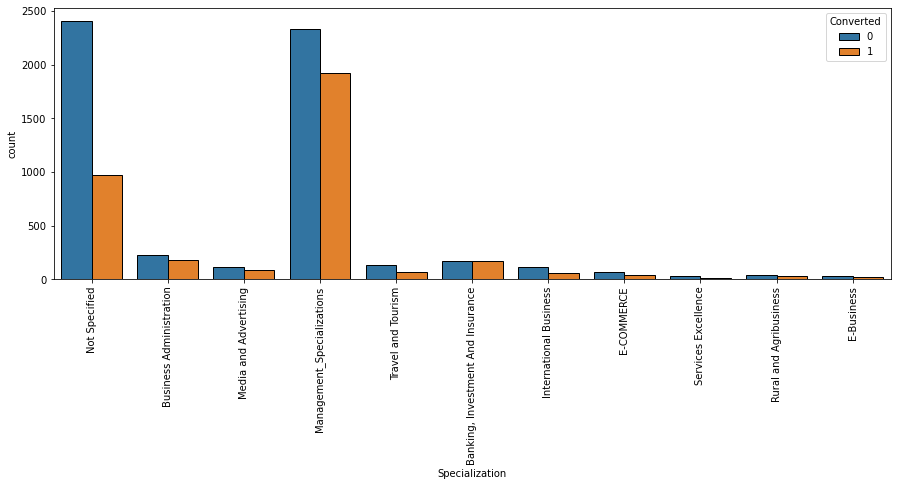

In [34]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted,ec='black')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
#What is your current occupation

Occupation_Counts = df['What is your current occupation'].value_counts(dropna=False)
print(Occupation_Counts)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [36]:
# Filling Nan Values with with Mode Unemployed Value 

df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [37]:
# after replacing checking with total values
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

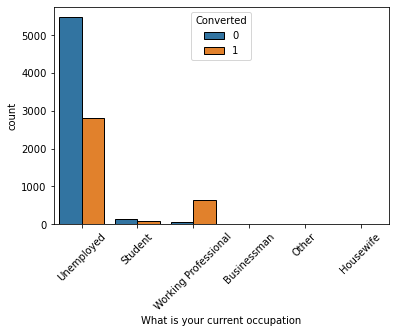

In [38]:
# Visualizing the count of a variable based on its converted value.

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='What is your current occupation', hue='Converted', data=df, ax=ax,ec='black')
plt.xticks(rotation=45)
plt.show()

- Working Professionals who are currently employed have a good probability of enrolling in the course.
- In terms of absolute numbers, unemployed leads are the most numerous.

In [39]:
# Checking Value Counts
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
# Replacing the Nan values with 'Better Career Prospects'

df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

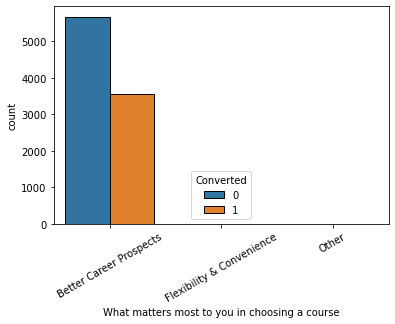

In [41]:
#visualizing count of Variable based on Converted value

sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted,ec='black')
plt.xticks(rotation=30)
plt.show()

In [42]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# Another column that is worth dropping is present here once more. Due to this, we Append to the Cols to Drop List.
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [44]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [45]:
# Replacing Nan values with "Not Specified"

df['Tags'].fillna('Not Specified', inplace=True)

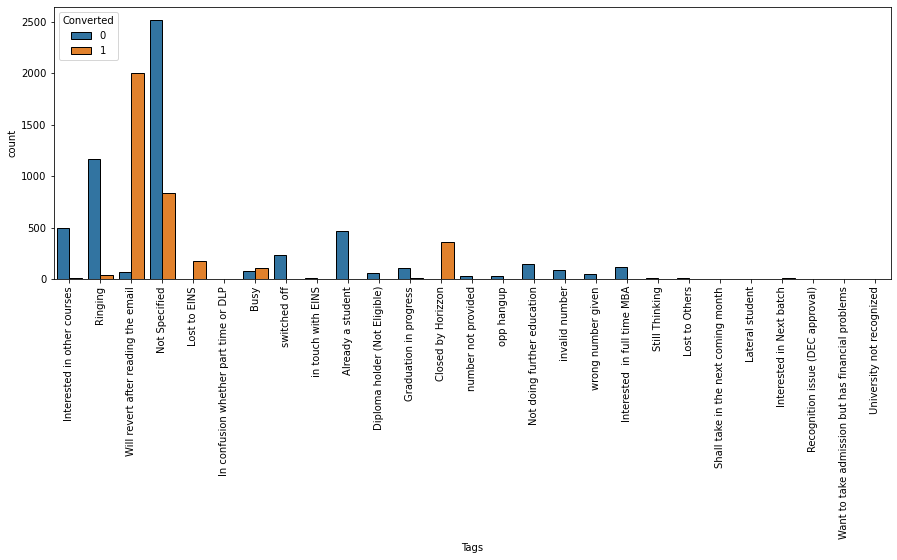

In [46]:
# Visualizing a variable's count based on its converted value

plt.figure(figsize=(15,5))
sns.countplot(df['Tags'], hue= df.Converted,ec='black')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Replacing low frequency tags with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [48]:
# Checking the percentage of missing values

df.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [49]:
# Examining the Lead Source column's value counts

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [50]:
# Combining low frequency values and replacing Nan values

df.loc[df['Lead Source'].isna(), 'Lead Source'] = 'Others'
df.loc[df['Lead Source'] == 'google', 'Lead Source'] = 'Google'
df.loc[df['Lead Source'] == 'Facebook', 'Lead Source'] = 'Social Media'
df.loc[df['Lead Source'].isin(['bing', 'Click2call', 'Press_Release',
                                     'youtubechannel', 'welearnblog_Home',
                                     'WeLearn', 'blog', 'Pay per Click Ads',
                                     'testone', 'NC_EDM']), 'Lead Source'] = 'Others'

- Several of the categories with lesser frequency of occurrence can be grouped together under the label "Others."

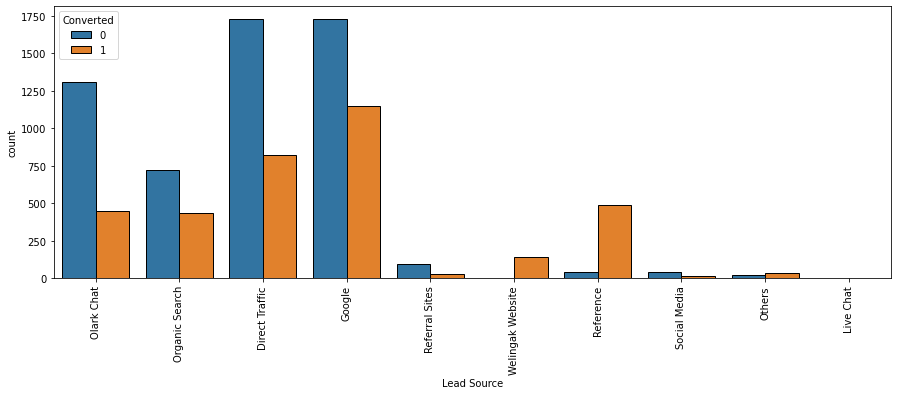

In [51]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(df['Lead Source'], hue=df.Converted,ec='black')
plt.xticks(rotation=90)
plt.show()

- To improve lead conversion rates, focus on Olark chat, organic search, direct traffic, and Google leads. Generate more leads from reference and Welingak website, which tend to have higher conversion rates.





In [52]:
# Last Activity Columns

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
# Replace Nan values and combine low frequency values
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [54]:
# Last Activity Column

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [55]:
# Checking the NUll values in all columns

round(df.isnull().mean() * 100, 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [56]:
# Remove every row with Nan values. Since less than 2% of the rows were dropped, the model will not be affected.

df = df.dropna()

In [57]:
# Checking the final Null values Percentage
round(df.isnull().mean() * 100, 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [58]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

- Lead generation and conversion are increased by using the Inference API and landing page submission.
- Although the lead count is not very big, the lead add form has a very high conversion rate.
- Few leads are generated by Quick Add Form and Lead Import.
- We need to increase lead generation from the lead add form and increase lead conversion from API and landing page submission sources in order to increase overall lead conversion rate.

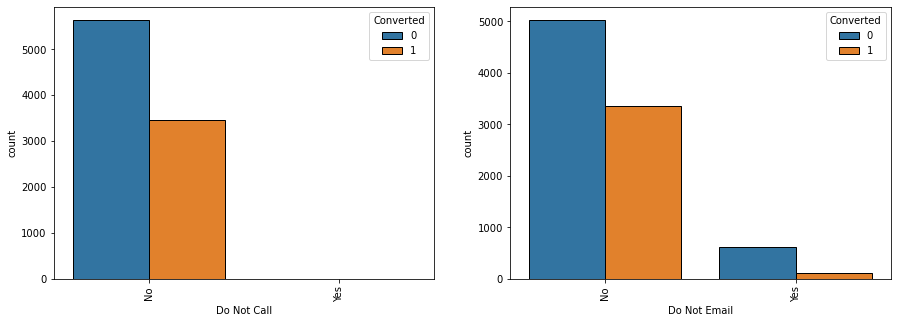

In [59]:
# Do Not Email & Do Not Call column analysis
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(df['Do Not Call'], hue=df.Converted,ec='black')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(df['Do Not Email'], hue=df.Converted,ec='black')
plt.xticks(rotation=90)
plt.show()

In [60]:
# Checking the Values count in Do Not Call columns 
df['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [61]:
# Checking the values counts in 'Do Not Email'
df['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

- Its seems to be more than 90% of the columns have only one value, we can add the Do Not Call Column to the list of columns to be dropped.

In [62]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [63]:
# Dropable imbalanced columns

df.Search.value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [64]:
df.Magazine.value_counts()

No    9103
Name: Magazine, dtype: int64

In [65]:
df['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [66]:
df['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [67]:
df['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [68]:
df['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [69]:
df['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [70]:
df['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [71]:
df['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [72]:
df['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [73]:
df['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [74]:
df['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [75]:
#Adding imbalanced columns to the list of columns to be dropped
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [76]:
# Checking the value counts for last Notable activity column
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [77]:
# COmbining the lower frequency values

lower_freq_activities = ['Had a Phone Conversation',
                          'Email Marked Spam',
                          'Unreachable',
                          'Unsubscribed',
                          'Email Bounced',                                                                    
                          'Resubscribed to emails',
                          'View in browser link Clicked',
                          'Approached upfront', 
                          'Form Submitted on Website', 
                          'Email Received']

df['Last Notable Activity'] = df['Last Notable Activity'].map(lambda x: 'Other_Notable_activity' if x in lower_freq_activities else x)


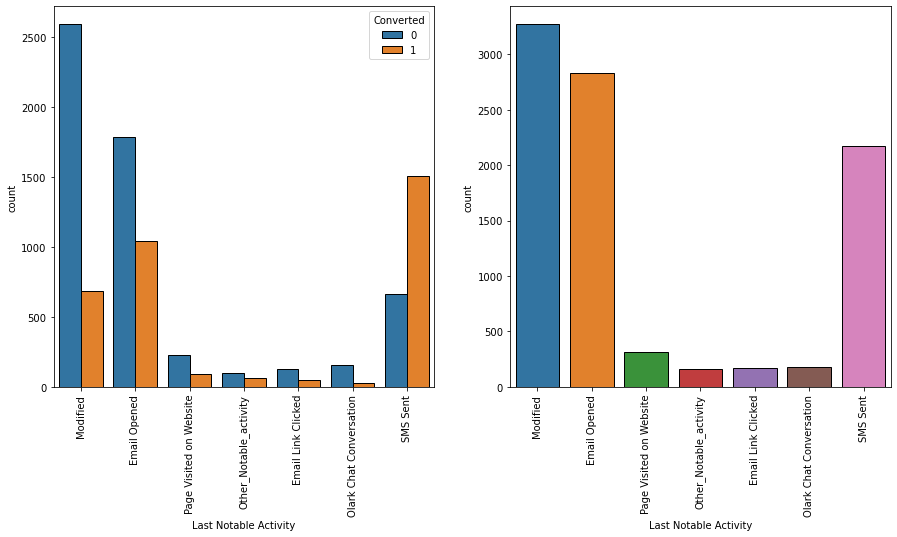

In [78]:
plt.figure(figsize=(15,7))
plt.subplot(121)

sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df,ec='black')
plt.xticks(rotation=90)


#visualizing count of Variable based on Converted value
plt.subplot(122)
sns.countplot(x = "Last Notable Activity", data = df,ec='black')
plt.xticks(rotation=90)
plt.show()

In [79]:
# Checking the value counts for variables columns

df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [80]:
# we have created separate list of columns to drop, that need to be treated

df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [81]:
#dropping columns
df = df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Numerical columns to be Analysis

In [82]:
#Verifying the percentage of data that has converted values equal to 1:

Converted = np.mean(df['Converted']) * 100
Converted

38.02043282434362

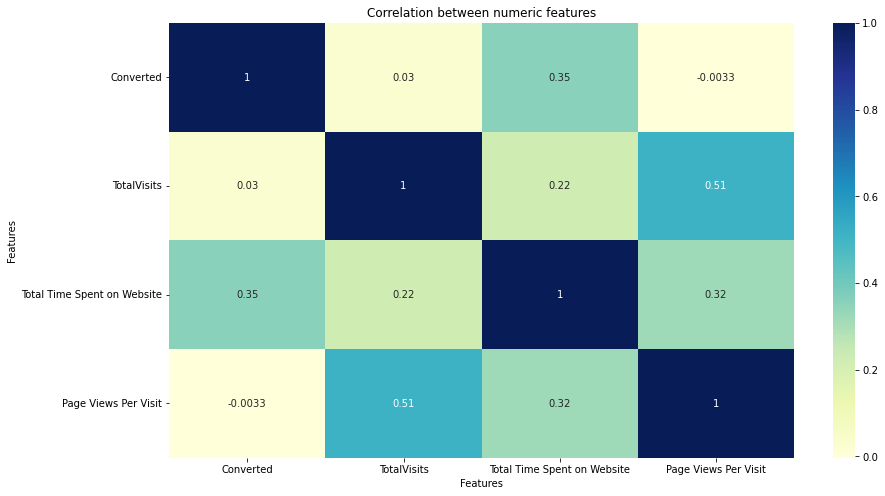

In [83]:
# Checking correlations of numeric variables
fig, ax = plt.subplots(figsize=(14, 8))
# Create heatmap
heatmap = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)
# Set axis labels and title
ax.set_title("Correlation between numeric features")
ax.set_xlabel("Features")
ax.set_ylabel("Features")
plt.show()

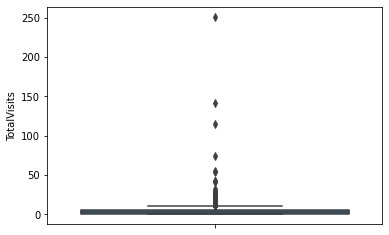

In [84]:
# Analyzing Total Visits column
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

- Here we can clearly see the prsence of outliers.

In [85]:
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

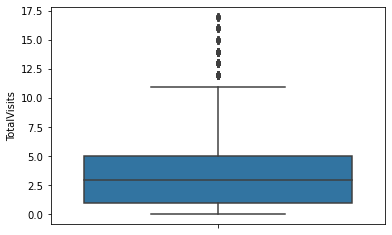

In [86]:
# Eliminate the top and bottom 1% of the column's outlier values.

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [87]:
df.shape

(9020, 14)

In [88]:
# checking percentiles for "Total Time Spent on Website" column

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

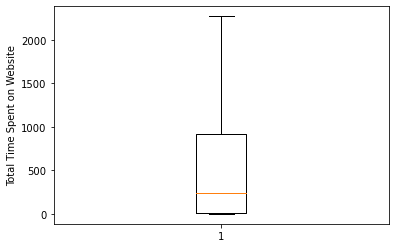

In [89]:
# Visualizing the numerical variable 
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(df['Total Time Spent on Website'], vert=True)
ax.set_ylabel('Total Time Spent on Website')
plt.show()

- Its seem to be there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [90]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

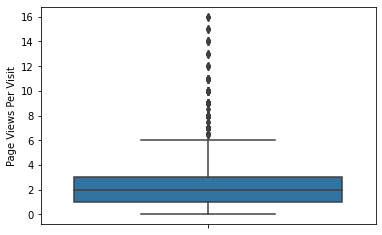

In [91]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

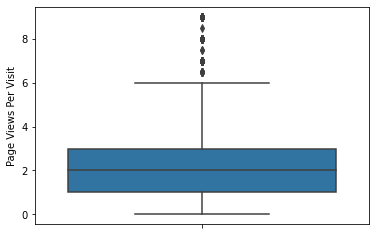

In [92]:
# Removing top & bottom 1% outlier

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y= df['Page Views Per Visit'])
plt.show()

In [93]:
df.shape

(8953, 14)

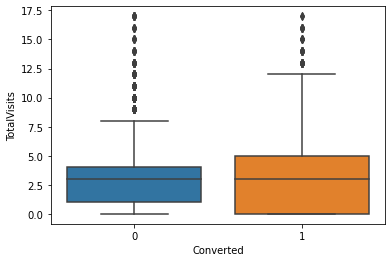

In [94]:
#comparing the Spread of the Converted Variable to the Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

- The median number of website visits for leads that converted and those that did not convert are similar. However, relying solely on the total number of website visits to predict lead conversion is inconclusive."

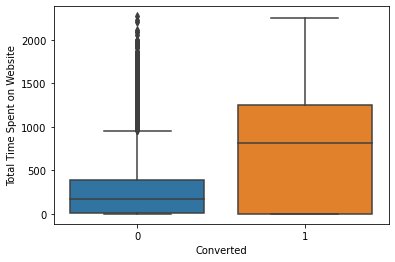

In [95]:
# comparing "Total Time Spent on Website" Spread to Converted Variable

sns.boxplot(x= df.Converted, y=df['Total Time Spent on Website'])
plt.show()

- To increase lead conversion, the website should be made more engaging since leads who spend more time on the website are more likely to be converted.`

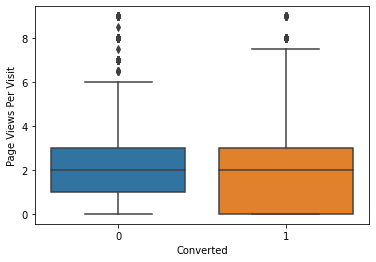

In [96]:
# checking Spread of "Page Views Per Visit" vs Converted variable


sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

- The median number of website visits for leads that converted and those that did not convert are identical. However, it is not possible to draw any specific conclusions regarding lead conversion based solely on the metric of page views per visit.

In [97]:
# Checking for missing values in remaining columns

missing_percentage = round(100 * (df.isnull().sum() / len(df.index)), 2)
print(f"Percentage of missing values in each column:\n{missing_percentage}")

Percentage of missing values in each column:
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


- Its seem to be there is no missing values for further analysis.

### Creating Dummy variable for Categorical columns

In [98]:
# Getting a list for categorical columns

Categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
Categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [99]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview', 'Do Not Email']

# Mapping function
binary_map = lambda x: x.map({'Yes': 1, 'No': 0})

# Applying the function to the leads DataFrame
df[varlist] = df[varlist].apply(binary_map)


In [100]:
# Adding the resulting dummy variables to the main dataframe after dropping the first column.

dummy_df = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

# Joining the dummy_df to the original dataframe using the index
df = df.join(dummy_df)

In [101]:
# Extracting the 'Specialization' column from the leads dataframe
specialization_col = df['Specialization']

# Encoding the column using one-hot encoding and drop the 'Specialization_Not Specified' column
dummy = pd.get_dummies(specialization_col, prefix='Specialization').drop(['Specialization_Not Specified'], axis=1)

# Concatenate the original leads dataframe with the dummy variable dataframe along axis=1
df = pd.concat([df, dummy], axis=1)


In [102]:
df = pd.concat([df, pd.get_dummies(df['Lead Source'], prefix='Lead Source')
                   .drop('Lead Source_Others', axis=1)], axis=1)


In [103]:
# Creating dummy variables for 'Last Activity' and drop the 'Last Activity_Others' column
df = pd.concat([df, pd.get_dummies(df['Last Activity'], prefix='Last Activity').drop('Last Activity_Others', axis=1)], axis=1)


In [104]:
# Creating dummy variables from the 'Last Notable Activity' column and drop the 'Last Notable Activity_Other_Notable_activity' column.
# Concatenating the resulting dummy variables to the 'df' dataframe along the columns axis.
df = pd.concat([df, pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
                        .drop(['Last Notable Activity_Other_Notable_activity'], axis=1)], axis=1)

In [105]:
# Creating dummy variables from the 'Tags' column and drop the 'Tags_Not Specified' column.
# Concatenating the resulting dummy variables to the 'leads' dataframe along the columns axis.
df = pd.concat([df, pd.get_dummies(df['Tags'], prefix='Tags')
                        .drop(['Tags_Not Specified'], axis=1)], axis=1)


In [106]:
#Dropping the original columns after dummy variable creation

df.drop(Categorical_columns,1,inplace = True)

In [107]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Model Building Over Logistic Regression:

In [108]:
# Importing train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [109]:
# Assigning the response variable to y# 
y = df['Converted']

# Displaying the first few rows of y
y.head()

# Creating the feature matrix X by dropping the response variable from the dataset
X = df.drop('Converted', axis=1)

In [110]:
# Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [112]:
# Importing  the necessary library for feature scaling
from sklearn.preprocessing import StandardScaler

In [113]:
# Creating an instance of the StandardScaler() class
scaler = StandardScaler()

# Selecting the numeric columns from the training dataset
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Applying the scaler to the selected numeric columns in the training dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Display the first few rows of the scaled training dataset
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


#### Scaling of numerical data:

In [114]:
# Importing the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [115]:
# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Identify the numeric columns in the training dataset
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Applying the scaler to the numeric columns in the training dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


#### Model building using stats models and RFE approach:

In [116]:
# Importing necessary Libary

import statsmodels.api as sm

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15) # create RFE object with 15 features to select
rfe.fit(X_train, y_train) # fit RFE object to training data

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [118]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [119]:
# Creating a list of tuples containing the feature name, whether it was selected by RFE, and its ranking
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
selected_features

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [120]:
# Extracting the names of the RFE-supported columns into a list
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')


In [121]:
# Extracting the names of the columns that were not selected by RFE into a list
excluded_columns = X_train.columns[~rfe.support_]

print(excluded_columns)

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

### Building first GLM Model

In [122]:
# Adding a constant to the training data
X_train_sm = sm.add_constant(X_train[selected_columns])

# Fitting the model to the training data
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Printing a summary of the model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 21 Mar 2023   Deviance:                       2509.3
Time:                        11:47:14   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

# Model 2

In [123]:
# Add a constant column to the training data
X_train_sm = sm.add_constant(X_train[selected_columns])

# Create a logistic regression model with binomial family
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# Fit the model and store the results in res variable
res = logm2.fit()

# Print the summary of the fitted model
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 21 Mar 2023   Deviance:                       2509.3
Time:                        11:47:14   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

- As all p-values are below a certain threshold, it might be worth examining the Variance Inflation Factor in order to investigate possible correlations among the variables.

In [124]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# Computing the variance inflation factors (VIFs) for the features in the training set
vif_values = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]

# Create a dataframe with the feature names and their respective VIFs, sorted by VIF in descending order
vif_df = pd.DataFrame({'Features': X_train[selected_columns].columns, 'VIF': vif_values}).sort_values(by='VIF', ascending=False)
vif_df['VIF'] = round(vif_df['VIF'], 2)

# Displaying the VIF dataframe
display(vif_df)


,Features,VIF
8,Last Notable Activity_SMS Sent,6.22
5,Last Activity_SMS Sent,6.13
1,Lead Origin_Lead Add Form,1.82
6,Last Notable Activity_Modified,1.69
14,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.39
4,Lead Source_Welingak Website,1.34
12,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
9,Tags_Closed by Horizzon,1.21


- Its Seems to be given the strong correlation between two variables, it may be necessary to eliminate the variable with a higher VIF value.

# Model 3

In [126]:
X_train_with_const = sm.add_constant(X_train[selected_columns])

# Create a logistic regression model with binomial family
binomial_model = sm.GLM(y_train, X_train_with_const, family=sm.families.Binomial())

# Fit the model and store the results in results variable
results = binomial_model.fit()

# Print the summary of the fitted model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 21 Mar 2023   Deviance:                       2509.3
Time:                        11:47:15   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [127]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,6.22
5,Last Activity_SMS Sent,6.13
1,Lead Origin_Lead Add Form,1.82
6,Last Notable Activity_Modified,1.69
14,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.39
4,Lead Source_Welingak Website,1.34
12,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
9,Tags_Closed by Horizzon,1.21


- Since the values appear to be properly organized, the next step is to generate probabilities, lead scores, and predictions for the training data.

In [128]:
# Predicting the target variable for the training set using the trained model
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.296184
4696    0.032633
3274    0.619282
2164    0.008354
1667    0.987448
7024    0.122149
8018    0.024494
778     0.139344
6942    0.003342
4440    0.089524
dtype: float64

In [129]:
# Reshaping the predicted target variable values from a 2D array to a 1D array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29618386, 0.03263337, 0.61928241, 0.00835351, 0.98744813,
       0.12214874, 0.02449398, 0.13934362, 0.00334188, 0.08952388])

In [130]:
# Creating a DataFrame with predicted probabilities and corresponding Prospect IDs
y_train_pred_final = pd.DataFrame({'Converted': y_train.values,
                                   'Converted_prob': y_train_pred, 'Prospect ID': y_train.index})
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.296184,9196
1,0,0.032633,4696
2,0,0.619282,3274
3,0,0.008354,2164
4,1,0.987448,1667


In [131]:
# Creating a new column 'Predicted' based on the predicted probabilities
y_train_pred_final['Predicted'] = (y_train_pred_final['Converted_prob'] > 0.5).astype(int)

# Preview the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.296184,9196,0
1,0,0.032633,4696,0
2,0,0.619282,3274,1
3,0,0.008354,2164,0
4,1,0.987448,1667,1


In [132]:
from sklearn import metrics

In [133]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3699  183]
 [ 286 2099]]


In [134]:
# Checking the accuracy of the models
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9251635551300462


In [135]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [136]:
# Cheking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.880083857442348

In [137]:
# calculating the specificity
TN / float(TN+FP)

0.9528593508500772

In [138]:
# Need to compute the false positive rate, which involves predicting a conversion when the customer actually did not convert.
print(FP/ float(TN+FP))

0.04714064914992272


In [139]:
# positive predictive value 
print (TP / float(TP+FP))

0.9198071866783524


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9282308657465496


### Plotting the RUC Curve

In [141]:
def plot_roc_curve(actual, predicted_probabilities):
    """
    Plots the ROC curve based on the actual and predicted probabilities of the target class.
    """
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted_probabilities, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, predicted_probabilities)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [142]:
thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

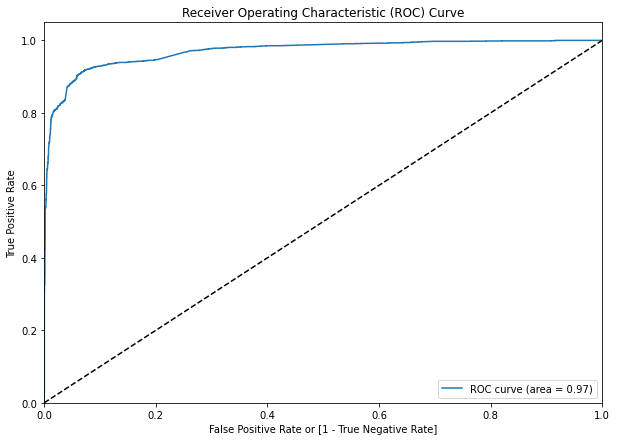

In [143]:
plot_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Since the ROC curve value is 0.97, which is close to 1, this indicates that our predictive model is performing well.

#### FInding the Optimal Cut-Off Value

In the previous step, we used a cut-off value of 0.5 arbitrarily. The following section will address the determination of the optimal cut-off value.

In [144]:
# Create columns with different probability cutoffs for classification of leads as converted or not converted.
cutoffs = [float(x)/10 for x in range(10)]
for i in cutoffs:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.296184,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.032633,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.619282,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.008354,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.987448,1667,1,1,1,1,1,1,1,1,1,1,1


In [145]:
# Calculate accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.820169  0.972327  0.726687
0.2   0.2  0.909047  0.929979  0.896188
0.3   0.3  0.923727  0.916981  0.927872
0.4   0.4  0.925483  0.899371  0.941525
0.5   0.5  0.925164  0.880084  0.952859
0.6   0.6  0.914792  0.830189  0.966770
0.7   0.7  0.914792  0.810063  0.979134
0.8   0.8  0.910962  0.786583  0.987378
0.9   0.9  0.888623  0.723270  0.990211


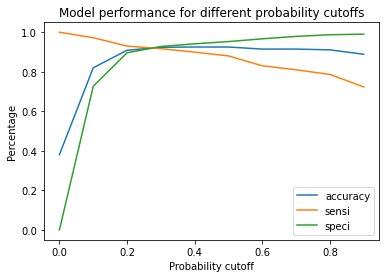

In [146]:
# Generate plots for accuracy, sensitivity, and specificity with respect to different probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Model performance for different probability cutoffs')
plt.xlabel('Probability cutoff')
plt.ylabel('Percentage')
plt.legend()

plt.show()

In [147]:
# Based on the curve above, the optimal cutoff probability appears to be 0.3.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.296184,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.032633,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.619282,3274,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.008354,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.987448,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].round(2) * 100

# Displaying the final predicted values along with the lead score.
y_train_pred_final[['Prospect ID', 'Converted', 'Converted_prob', 'final_Predicted', 'Lead_Score']].head()

,Prospect ID,Converted,Converted_prob,final_Predicted,Lead_Score
0,9196,1,0.296184,0,30.0
1,4696,0,0.032633,0,3.0
2,3274,0,0.619282,1,62.0
3,2164,0,0.008354,0,1.0
4,1667,1,0.987448,1,99.0


In [149]:
# Cheking the overall accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9237274613052497

In [150]:
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_matrix2

array([[3602,  280],
       [ 198, 2187]], dtype=int64)

In [151]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

In [152]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [153]:
# calculating the specificity
TN / float(TN+FP)

0.9278722308088614

Conclusion: 
    
- Based on the observations, it appears that the model is performing well. The ROC curve has a value of 0.97, which is indicative of high performance. In terms of the training data, we have achieved an accuracy of 92.34%, a sensitivity of 91.69%, and a specificity of 92.73%.

In [154]:
# Below are some other statistical measures we derived, including the false positive rate, positive predictive value, negative predictive value, precision, and recall.

In [155]:
# calculating the rate of false positive predictions, which corresponds to predicting a conversion when the customer did not actually convert.
print(FP/ float(TN+FP))

0.07212776919113859


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8865018240778273


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478947368421052


In [158]:
# Checking the confusion matrix again

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_matrix

array([[3602,  280],
       [ 198, 2187]], dtype=int64)

In [159]:
# Precision
TP / TP + FP

confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.8865018240778273

In [160]:
# Recall the values
TP / TP + FN

confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.9169811320754717

In [161]:
from sklearn.metrics import precision_score, recall_score

In [162]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8865018240778273

In [163]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

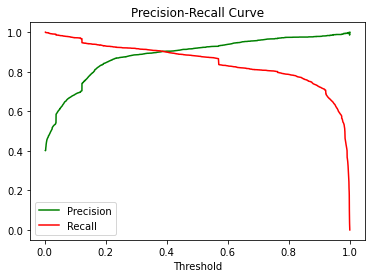

In [166]:
# Calculating precision and recall for different probability thresholds.
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

# Plot precision and recall against different probability thresholds.
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()


In [167]:
#scaling test set

numerical_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [168]:
X_test = X_test[selected_columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,0,1,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,0,0,1,1,0,0,0,0,0,1,0,0
8135,0.812462,0,1,0,0,1,0,0,1,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [169]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2686, 16)

### Making Prediction on Test Set

In [170]:
y_test_pred = res.predict(X_test_sm)

In [171]:
y_test_pred[:10]

7681    0.025717
984     0.015190
8135    0.722987
6915    0.004775
2712    0.945750
244     0.002829
4698    0.012727
8287    0.036479
6791    0.978743
8970    0.007401
dtype: float64

In [172]:
# Transforming the array y_pred into a dataframe format.
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Checking the dataframe
y_pred_1.head()

,0
7681,0.025717
984,0.015190
8135,0.722987
6915,0.004775
2712,0.945750


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Combining y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.025717
1,0,984,0.015190
2,0,8135,0.722987
3,0,6915,0.004775
4,1,2712,0.945750


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [180]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.025717
1,0,984,0.015190
2,0,8135,0.722987
3,0,6915,0.004775
4,1,2712,0.945750


In [181]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [182]:
# Cheking the y_pred_final Dataframe
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.025717,3
1,984,0,0.015190,2
2,8135,0,0.722987,72
3,6915,0,0.004775,0
4,2712,1,0.945750,95


In [183]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [184]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.025717,3,0
1,984,0,0.015190,2,0
2,8135,0,0.722987,72,1
3,6915,0,0.004775,0,0
4,2712,1,0.945750,95,1


In [185]:
# checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.926656738644825

In [186]:
from sklearn.metrics import f1_score
f1_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9037616023448951

In [187]:
confusion_matrix2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_matrix2

array([[1564,  112],
       [  85,  925]], dtype=int64)

In [188]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negative

In [189]:
#Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9158415841584159

In [190]:
# calculating the specificity
TN / float(TN+FP)

0.9331742243436754

In [191]:
# Cheking the precison Score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8919961427193829

In [192]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9158415841584159

The results of the model performance on the Test Data are as follows:

- The Accuracy of the model is 92.66%, indicating the percentage of correct predictions made by the model.
- The Sensitivity of the model is 91.58%, which represents the proportion of true positive predictions compared to the actual positive instances in the data.
- The Specificity of the model is 93.17%, which denotes the ratio of true negative predictions to the actual negative instances in the data.
- Overall, these figures suggest that the model has performed well on the test data and has a high level of accuracy in predicting the outcomes.

## Conclusion:

- Landing Page Submissions and Lead Add Form lead to more conversions.
- Conversions are higher for leads from Google, Organic Search, Direct Traffic, and Referrals.
- SMS and Email marketing leads have higher conversions.
- Finance, HR, Marketing, Operations, and Banking sector leads tend to convert more.
- "Better Career Prospects" option for career outcome leads to higher conversions.
- Leads spending more time on the website tend to convert more.
- Reducing website bounce rate can increase customer engagement time and conversions.
- Lead Add Form generates qualifying leads and should be used across key areas.
- Sales team should focus on working professionals for higher conversions.
- Leads with a Lead Score >0.35 tend to convert more and model accuracy score is 91%.
